In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
inputs = keras.Input(shape=(784,))

In [4]:
#Just for demonstration purposes.
img_inputs = keras.Input(shape=(32, 32, 3))

In [5]:
inputs.shape

TensorShape([None, 784])

In [6]:
inputs.dtype

tf.float32

In [7]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [8]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [9]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [10]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


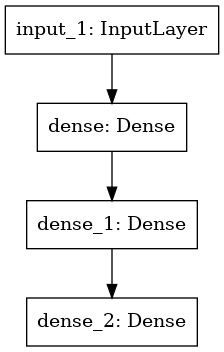

In [11]:
keras.utils.plot_model(model, "my_first_model.png")

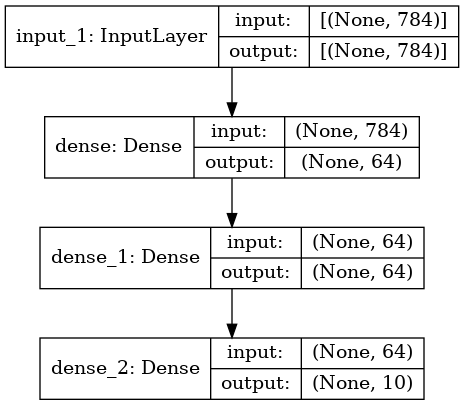

In [12]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/2
750/750 [==============================] - 3s 3ms/step - loss: 0.5962 - accuracy: 0.8387 - val_loss: 0.1910 - val_accuracy: 0.9437
Epoch 2/2
750/750 [==============================] - 2s 2ms/step - loss: 0.1669 - accuracy: 0.9505 - val_loss: 0.1454 - val_accuracy: 0.9569
313/313 - 0s - loss: 0.1391 - accuracy: 0.9566
Test loss: 0.1390933096408844
Test accuracy: 0.95660001039505


In [14]:
history.history

{'loss': [0.34997105598449707, 0.15921862423419952],
 'accuracy': [0.9021458625793457, 0.953000009059906],
 'val_loss': [0.19096408784389496, 0.1454017162322998],
 'val_accuracy': [0.9436666369438171, 0.9569166898727417]}

## Save and serialize

In [15]:
model.save('path to my_model')
del model

INFO:tensorflow:Assets written to: path to my_model/assets


In [16]:
model = keras.models.load_model('path to my_model')

In [17]:
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7f1c6223fc50>>

In [18]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.0789799 , -0.04268615,  0.01372994, ...,  0.01779516,
         -0.06030421,  0.05326291],
        [-0.07113802, -0.067939  ,  0.03566816, ...,  0.018256  ,
         -0.06635097, -0.05244432],
        [-0.07899629, -0.01702347,  0.05016992, ...,  0.03893905,
         -0.04185909, -0.03725497],
        ...,
        [ 0.07815088, -0.08169542, -0.01742905, ...,  0.01838634,
          0.04369881, -0.04394019],
        [-0.0517428 ,  0.07641392, -0.05478104, ..., -0.06847571,
         -0.01815898, -0.07004094],
        [ 0.06454637,  0.02670389,  0.00260454, ..., -0.08028358,
         -0.00330073, -0.07130121]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.01082728,  0.00333597,  0.04856141,  0.07259995,  0.06622438,
        -0.02507894, -0.00736773,  0.06258442, -0.08877829, -0.01135722,
         0.04325088,  0.06114857,  0.0405944 ,  0.00618535,  0.00575472,
      

In [19]:
model.optimizer

In [29]:
encoder_input = keras.Input(shape=(28,28,1), name = 'img')
x = layers.Conv2D(16,3, activation = 'relu')(encoder_input)
x = layers.Conv2D(16,3, activation = 'relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32,3, activation = 'relu')(x)
x = layers.Conv2D(16,3, activation = 'relu')(x)
encoder_output = layers.GlobalMaxPool2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name = 'encoder')
encoder.summary()

x = layers.Reshape((4,4,1))(encoder_output)
x = layers.Conv2DTranspose(16,3, activation = 'relu')(x)
x = layers.Conv2DTranspose(16,3, activation = 'relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16,3, activation = 'relu')(x)
decoder_output = layers.Conv2DTranspose(1,3, activation = 'relu')(x)

autoencoder = keras.Model(encoder_input, decoder_output, name= 'autoencoder')
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 6, 6, 32)          4640      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_4 (Glob (None, 16)                0   

In [30]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_5 (Glob (None, 16)                0   

In [34]:
def get_model() :
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1,y2,y3])
ensemble_model = keras.Model(inputs = inputs, outputs = outputs)

In [35]:
ensemble_model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
model_7 (Functional)            (None, 1)            129         input_14[0][0]                   
__________________________________________________________________________________________________
model_8 (Functional)            (None, 1)            129         input_14[0][0]                   
__________________________________________________________________________________________________
model_9 (Functional)            (None, 1)            129         input_14[0][0]                   
___________________________________________________________________________________________

In [41]:
"""
입력
- 티켓 제목
- 티켓 본문 내용
- 사용자가 추가한 태그(범주)


출력
- 0~1 사이의 우선 순위 점수
- 티켓을 처리할 부서
"""

num_tags = 12
num_words = 10000
num_departments = 4

title_input = keras.Input(shape=(None,), name='title')

body_input = keras.Input(shape=(None,), name='body')
tags_input = keras.Input(shape=(num_tags,), name = 'tags')

title_features = layers.Embedding(num_words, 64)(title_input)
body_features = layers.Embedding(num_words, 64)(body_input)

title_features = layers.LSTM(128)(title_features)
body_features = layers.LSTM(32)(body_features)

x = layers.concatenate([title_features, body_features, tags_input])

priority_perd = layers.Dense(1, name = 'priority')(x)
department_pred = layers.Dense(num_departments, name='department')(x)

model = keras.Model(inputs = [title_input, body_input, tags_input],
                   outputs = [priority_perd, department_pred])

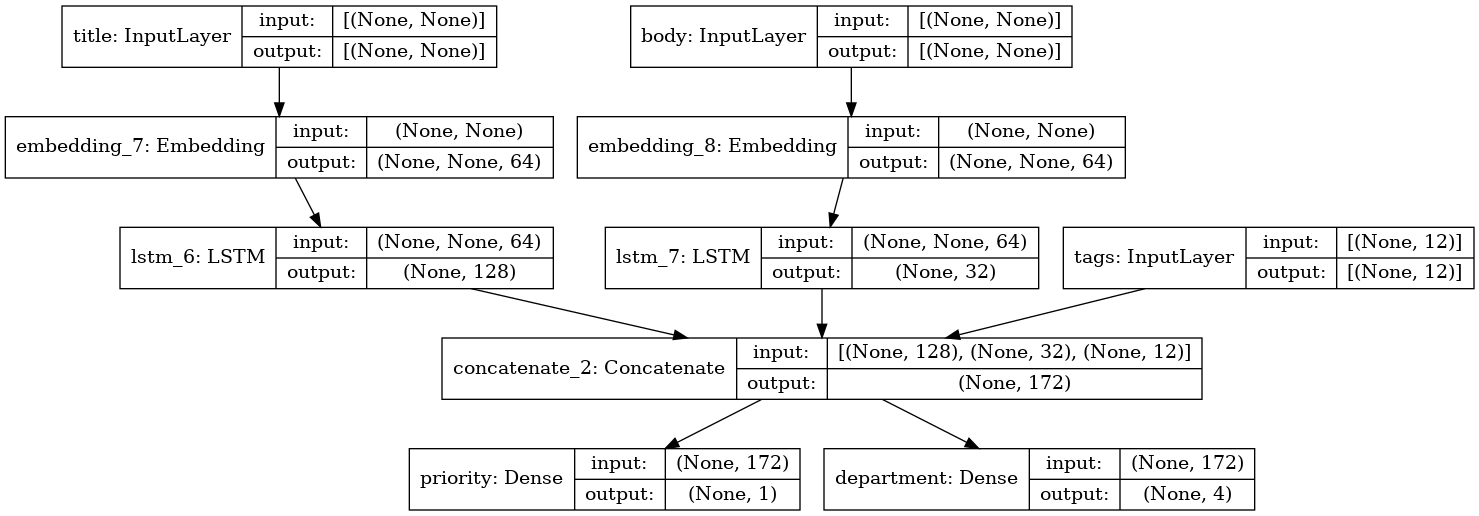

In [43]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

In [47]:
model.compile(
optimizer = keras.optimizers.RMSprop(1e-3),
loss = { 'priority' : keras.losses.BinaryCrossentropy(from_logits = True),
       'department' : keras.losses.CategoricalCrossentropy(from_logits = True),
       },
    loss_weights = [1.0, 0.2]  #가중치 설정
)

In [59]:
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)

Epoch 1/2
40/40 [==============================] - 5s 29ms/step - loss: 1.2659 - priority_loss: 0.7042 - department_loss: 2.8087
Epoch 2/2
40/40 [==============================] - 1s 29ms/step - loss: 1.2466 - priority_loss: 0.6962 - department_loss: 2.7519


In [51]:
np.random.randint(num_words, size=(1280, 10))

array([[4567, 4033, 8915, ..., 2343, 5031, 4297],
       [3867, 3127,  675, ..., 9521, 3731, 5016],
       [7095, 1623, 2412, ..., 9592, 8158, 8403],
       ...,
       [1438, 8331, 2603, ..., 8495, 6168, 3330],
       [6832,  370,  440, ...,  501, 7091, 3606],
       [6522, 3407, 6770, ...,  189, 8559, 2145]])

In [53]:
np.random.randint(2, size=(1280, num_tags)).astype('float32')
#해당할 땐 1, 태그를 가지고 있지 않을 땐 0으로 표기 됨.

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.]], dtype=float32)

## ResNet Model

In [60]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 28, 28, 64)   18496       conv2d_25[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_26[0][0]                  
_________________________________________________________________________________________

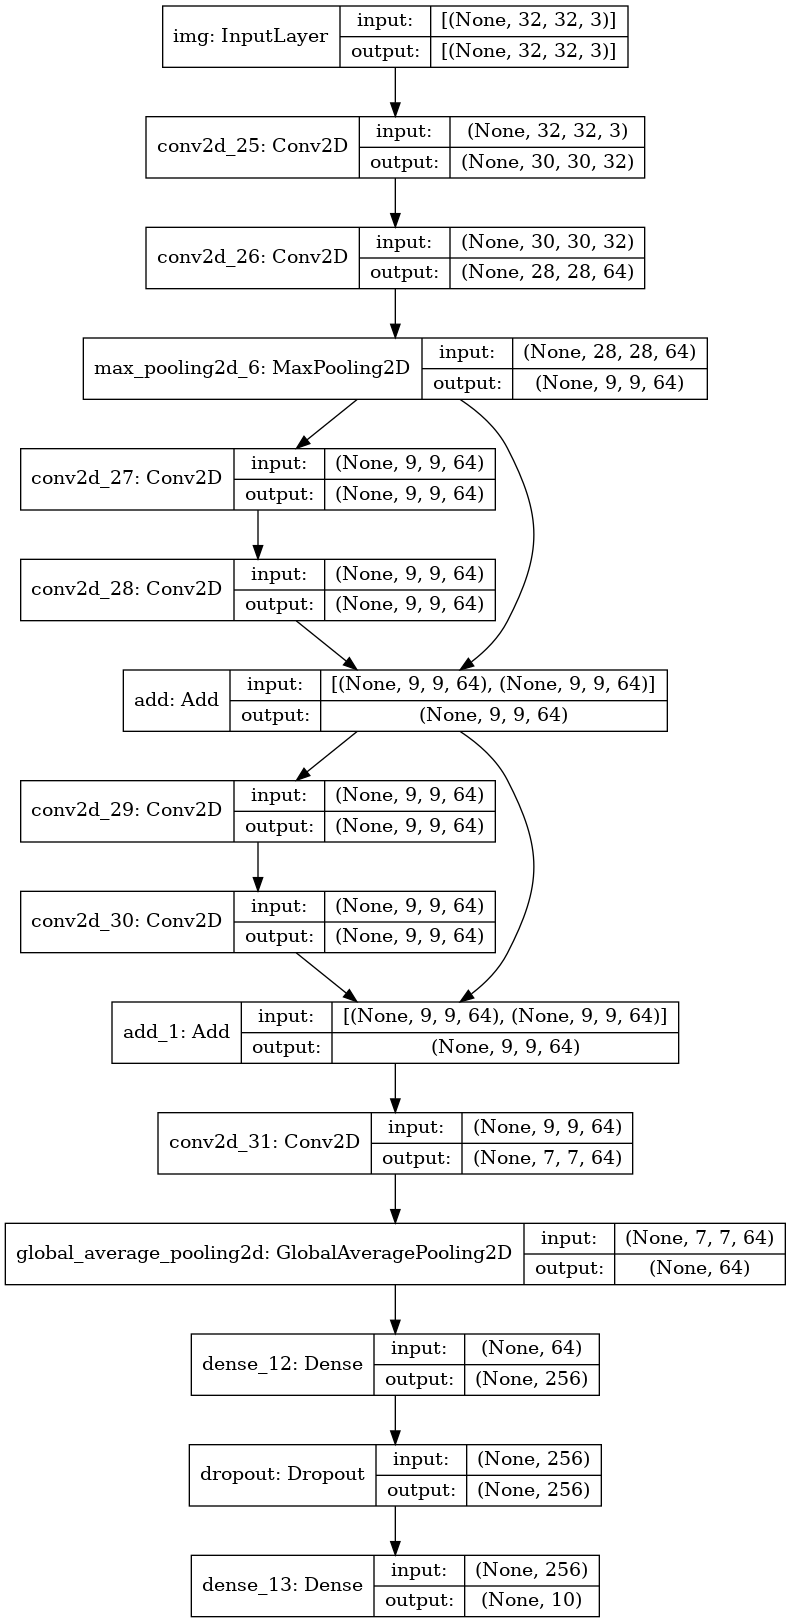

In [61]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

In [62]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=1, validation_split=0.2)

13/13 [==============================] - 9s 411ms/step - loss: 2.3101 - acc: 0.0921 - val_loss: 2.2985 - val_acc: 0.0700


## Shared layer

In [63]:
shared_embedding = layers.Embedding(1000, 128)

text_input_a = keras.Input(shape=(None,), dtype="int32")

text_input_b = keras.Input(shape=(None,), dtype="int32")

encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

## Extract and reuse nodes in the graph of layers

In [64]:
vgg19 = tf.keras.applications.VGG19()

574717952/574710816 [==============================] - 3s 0us/step


In [65]:
features_list = [layer.output for layer in vgg19.layers]

In [66]:
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)

img = np.random.random((1, 224, 224, 3)).astype("float32")
extracted_features = feat_extraction_model(img)

In [67]:
extracted_features[0]

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.2791802 , 0.12669875, 0.4075062 ],
         [0.5929257 , 0.89620364, 0.04563577],
         [0.69050777, 0.00498751, 0.7480755 ],
         ...,
         [0.5826256 , 0.29700723, 0.71921706],
         [0.59251225, 0.77353156, 0.56259865],
         [0.35075083, 0.946909  , 0.74919087]],

        [[0.59458506, 0.1631818 , 0.71643203],
         [0.31762186, 0.7944923 , 0.65385205],
         [0.19590358, 0.39983708, 0.72560006],
         ...,
         [0.20311177, 0.5487578 , 0.73639005],
         [0.5959221 , 0.27941108, 0.5040178 ],
         [0.58578885, 0.65404725, 0.5067135 ]],

        [[0.76402915, 0.25597405, 0.84482926],
         [0.45783746, 0.419631  , 0.94247276],
         [0.1728923 , 0.99459356, 0.87976336],
         ...,
         [0.37592596, 0.35979626, 0.4839041 ],
         [0.6355866 , 0.8370359 , 0.05049972],
         [0.40922722, 0.53421026, 0.4408087 ]],

        ...,

        [[0.9893791 , 0.4021271 , 

## Extend the API using custom layers

In [70]:
class CustomDense(layers.Layer):
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

    def get_config(self):
        return {"units": self.units}
    
def from_config(cls, config):
    return cls(**config)


inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)
config = model.get_config()

new_model = keras.Model.from_config(config, custom_objects={"CustomDense": CustomDense})

### 더 간결함

In [71]:
inputs = keras.Input(shape=(32,))
x = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10)(x)
mlp = keras.Model(inputs, outputs)

In [72]:
class MLP(keras.Model):

  def __init__(self, **kwargs):
    super(MLP, self).__init__(**kwargs)
    self.dense_1 = layers.Dense(64, activation='relu')
    self.dense_2 = layers.Dense(10)

  def call(self, inputs):
    x = self.dense_1(inputs)
    return self.dense_2(x)

mlp = MLP()

_ = mlp(tf.zeros((1, 32)))

- functional API와 아래의 subclassed version을 비교하면 functional API가 훨씬 간편하다는 것을 알 수 있음.

## Mix-and-match API styles

In [73]:
units = 32
timesteps = 10
input_dim = 5

inputs = keras.Input((None, units))
x = layers.GlobalAveragePooling1D()(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)


class CustomRNN(layers.Layer):
    def __init__(self):
        super(CustomRNN, self).__init__()
        self.units = units
        self.projection_1 = layers.Dense(units=units, activation="tanh")
        self.projection_2 = layers.Dense(units=units, activation="tanh")
        self.classifier = model

    def call(self, inputs):
        outputs = []
        state = tf.zeros(shape=(inputs.shape[0], self.units))
        for t in range(inputs.shape[1]):
            x = inputs[:, t, :]
            h = self.projection_1(x)
            y = h + self.projection_2(state)
            state = y
            outputs.append(y)
        features = tf.stack(outputs, axis=1)
        print(features.shape)
        return self.classifier(features)


rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1, timesteps, input_dim)))

(1, 10, 32)
